In [305]:
import pandas as pd
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import os
import geopandas as gpd
from shapely.geometry import Point
import shapely.geometry
import pylab as pl
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
import zipfile
import urllib

Populating the interactive namespace from numpy and matplotlib


In [306]:
PUIdata = os.getenv('PUIDATA')

In [307]:
df = pd.read_csv('rape_2015.csv')
df.columns

Index([u'OBJECTID', u'Identifier', u'OccurrenceDate', u'DayofWeek',
       u'OccurrenceMonth', u'Unnamed: 5', u'OccurrenceDay', u'OccurrenceYear',
       u'OccurrenceHour', u'CompStatMonth', u'Unnamed: 10', u'CompStatDay',
       u'CompStatYear', u'Start Date', u'End Date', u'Date gap', u'Offense',
       u'OffenseClassification', u'Sector', u'Precinct', u'Borough',
       u'Jurisdiction', u'XCoordinate', u'YCoordinate', u'Latitude',
       u'Longitude'],
      dtype='object')

In [308]:
df = df[['Identifier','OccurrenceDate','DayofWeek','OccurrenceMonth','OccurrenceHour','Start Date','End Date','Offense','Date gap','Latitude','Longitude']]
df.head()

,Identifier,OccurrenceDate,DayofWeek,OccurrenceMonth,OccurrenceHour,Start Date,End Date,Offense,Date gap,Latitude,Longitude
0,2.020000e+14,1/1/2015 0:00,Thursday,Jan,0,1/1/2015,7/18/2015,RAPE,198,40.576157,-73.975984
1,2.020000e+14,1/1/2015 0:00,Thursday,Jan,0,1/1/2015,5/23/2015,RAPE,142,40.760185,-73.767843
2,2.020000e+14,1/1/2015 0:01,Thursday,Jan,0,1/1/2015,7/16/2015,RAPE,196,40.644726,-74.077483
3,2.020000e+14,1/1/2015 0:01,Thursday,Jan,0,1/1/2015,8/26/2015,RAPE,237,40.800694,-73.941109
4,2.020000e+14,1/1/2015 0:01,Thursday,Jan,0,1/1/2015,9/18/2015,RAPE,260,40.576157,-73.975984


In [309]:
df['OccurrenceDate'] = pd.to_datetime(df['OccurrenceDate'])
df['weekday'] = [i not in [5,6] for i in df['OccurrenceDate'].dt.weekday.values]
df.head()

,Identifier,OccurrenceDate,DayofWeek,OccurrenceMonth,OccurrenceHour,Start Date,End Date,Offense,Date gap,Latitude,Longitude,weekday
0,2.020000e+14,2015-01-01 00:00:00,Thursday,Jan,0,1/1/2015,7/18/2015,RAPE,198,40.576157,-73.975984,True
1,2.020000e+14,2015-01-01 00:00:00,Thursday,Jan,0,1/1/2015,5/23/2015,RAPE,142,40.760185,-73.767843,True
2,2.020000e+14,2015-01-01 00:01:00,Thursday,Jan,0,1/1/2015,7/16/2015,RAPE,196,40.644726,-74.077483,True
3,2.020000e+14,2015-01-01 00:01:00,Thursday,Jan,0,1/1/2015,8/26/2015,RAPE,237,40.800694,-73.941109,True
4,2.020000e+14,2015-01-01 00:01:00,Thursday,Jan,0,1/1/2015,9/18/2015,RAPE,260,40.576157,-73.975984,True


In [310]:
df['OccurrenceHour'] = pd.to_datetime(df['OccurrenceDate']).dt.hour
df.head()

,Identifier,OccurrenceDate,DayofWeek,OccurrenceMonth,OccurrenceHour,Start Date,End Date,Offense,Date gap,Latitude,Longitude,weekday
0,2.020000e+14,2015-01-01 00:00:00,Thursday,Jan,0,1/1/2015,7/18/2015,RAPE,198,40.576157,-73.975984,True
1,2.020000e+14,2015-01-01 00:00:00,Thursday,Jan,0,1/1/2015,5/23/2015,RAPE,142,40.760185,-73.767843,True
2,2.020000e+14,2015-01-01 00:01:00,Thursday,Jan,0,1/1/2015,7/16/2015,RAPE,196,40.644726,-74.077483,True
3,2.020000e+14,2015-01-01 00:01:00,Thursday,Jan,0,1/1/2015,8/26/2015,RAPE,237,40.800694,-73.941109,True
4,2.020000e+14,2015-01-01 00:01:00,Thursday,Jan,0,1/1/2015,9/18/2015,RAPE,260,40.576157,-73.975984,True


In [311]:
df.groupby('DayofWeek')['Offense'].count()

DayofWeek
Friday       122
Monday       108
Saturday     150
Sunday       147
Thursday     109
Tuesday      105
Wednesday    104
Name: Offense, dtype: int64

In [193]:
df.groupby('OccurrenceHour')['Offense'].count()

OccurrenceHour
0     111
1      61
2      58
3      37
4      57
5      34
6      25
7      13
8      30
9      18
10     15
11     15
12     36
13     18
14     17
15     26
16     26
17     29
18     29
19     31
20     38
21     31
22     45
23     45
Name: Offense, dtype: int64

In [514]:
d = pd.DataFrame(df.groupby(['OccurrenceDate','OccurrenceHour','DayofWeek','OccurrenceMonth','Offense'],as_index=False).size())
d.reset_index(inplace=True)
d.columns = ['OccurrenceDate','OccurrenceHour','DayofWeek','OccurrenceMonth','Offense','Count']
d.head()

,OccurrenceDate,OccurrenceHour,DayofWeek,OccurrenceMonth,Offense,Count
0,2015-01-01 00:00:00,0,Thursday,Jan,RAPE,2
1,2015-01-01 00:01:00,0,Thursday,Jan,RAPE,9
2,2015-01-01 00:05:00,0,Thursday,Jan,RAPE,1
3,2015-01-01 01:30:00,1,Thursday,Jan,RAPE,2
4,2015-01-01 04:00:00,4,Thursday,Jan,RAPE,1


In [515]:
d_hour = pd.DataFrame(df.groupby('OccurrenceHour')['Offense'].count())
d_hour.reset_index(inplace=True)
d_hour.head()

,OccurrenceHour,Offense
0,0,111
1,1,61
2,2,58
3,3,37
4,4,57


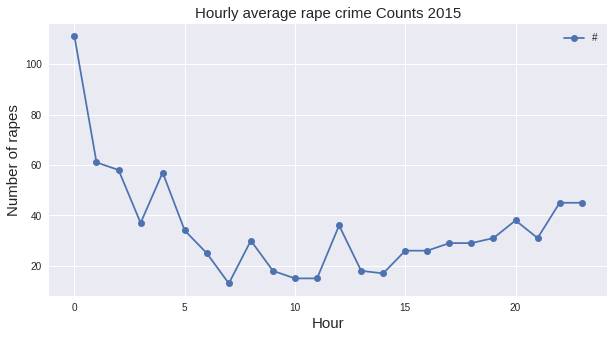

In [516]:
pl.figure(figsize=(10,5))
sns.set(style="darkgrid")
pl.plot((d_hour['Offense']),'o-',label=i)
pl.legend('#')
pl.xlabel('Hour',size=15)
pl.ylabel('Number of rapes',size=15)
pl.title('Hourly average rape crime Counts 2015',size=15)
pl.savefig('Avgrape_Hour.png',dpi=300)

In [517]:
d_date = pd.DataFrame(df.groupby('DayofWeek')['Offense'].count())
d_date.reset_index(inplace=True)
# d_date.sort_values('DayofWeek', inplace=True)
d_date

,DayofWeek,Offense
0,Friday,122
1,Monday,108
2,Saturday,150
3,Sunday,147
4,Thursday,109
5,Tuesday,105
6,Wednesday,104


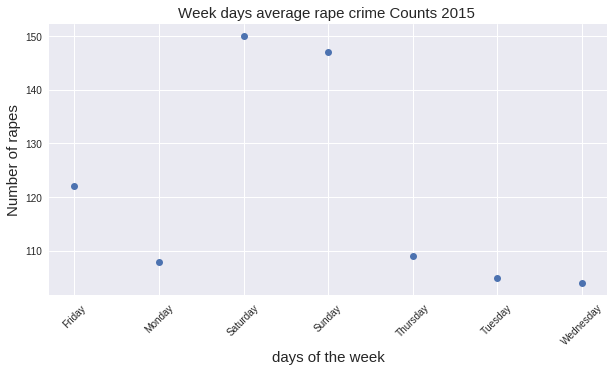

In [518]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.set(style="darkgrid")
ax.plot(d_date['Offense'],'o')
# pl.legend('#')
ax.set_xticks(np.arange(len(d_date)))
ax.set_xticklabels(d_date['DayofWeek'], rotation = 45)
ax.set_xlabel('days of the week',size=15)
ax.set_ylabel('Number of rapes',size=15)
ax.set_title('Week days average rape crime Counts 2015 ',size=15)
pl.savefig('Avgrape_Hour.png',dpi=300)

In [528]:
d_month = pd.DataFrame(df.groupby('OccurrenceMonth')['Offense'].count())
d_month.reset_index(inplace=True)
d_month

,OccurrenceMonth,Offense
0,Apr,84
1,Aug,107
2,Feb,61
3,Jan,93
4,Jul,111
5,Jun,106
6,Mar,94
7,May,103
8,Sep,86


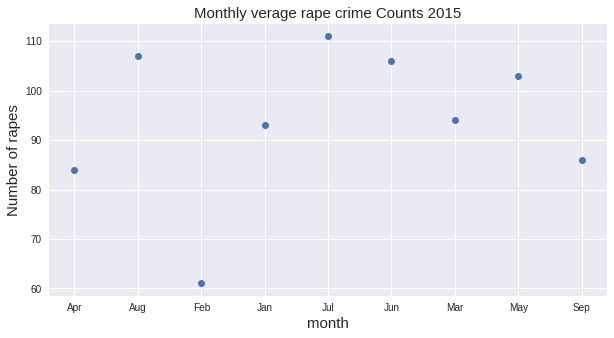

In [521]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.set(style="darkgrid")
ax.plot(d_month['Offense'],'o')
# pl.legend('#')
ax.set_xlabel('month',size=15)
ax.set_xticks(np.arange(len(d_month)))
ax.set_xticklabels(d_month['OccurrenceMonth'],rotation = 0)
ax.set_ylabel('Number of rapes',size=15)
ax.set_title('Monthly verage rape crime Counts 2015',size=15)
#pl.savefig('Avgrape_Hour.png',dpi=300)

In [384]:
df.head()

,Identifier,OccurrenceDate,DayofWeek,OccurrenceMonth,OccurrenceHour,Start Date,End Date,Offense,Date gap,Latitude,Longitude,weekday
0,2.020000e+14,2015-01-01 00:00:00,Thursday,Jan,0,1/1/2015,7/18/2015,RAPE,198,40.576157,-73.975984,True
1,2.020000e+14,2015-01-01 00:00:00,Thursday,Jan,0,1/1/2015,5/23/2015,RAPE,142,40.760185,-73.767843,True
2,2.020000e+14,2015-01-01 00:01:00,Thursday,Jan,0,1/1/2015,7/16/2015,RAPE,196,40.644726,-74.077483,True
3,2.020000e+14,2015-01-01 00:01:00,Thursday,Jan,0,1/1/2015,8/26/2015,RAPE,237,40.800694,-73.941109,True
4,2.020000e+14,2015-01-01 00:01:00,Thursday,Jan,0,1/1/2015,9/18/2015,RAPE,260,40.576157,-73.975984,True


In [393]:
dm = pd.DataFrame(df.groupby(['OccurrenceMonth','DayofWeek','OccurrenceHour'],as_index=False).size())
dm.reset_index(inplace=True)
dm.columns = ['OccurrenceMonth','DayofWeek','OccurrenceHour','Count']
dm.head()

,OccurrenceMonth,DayofWeek,OccurrenceHour,Count
0,Apr,Friday,0,1
1,Apr,Friday,17,1
2,Apr,Friday,18,1
3,Apr,Friday,20,1
4,Apr,Friday,22,1


In [394]:
import statsmodels.formula.api as smf

In [395]:
lm = smf.ols(formula="Count ~ DayofWeek + OccurrenceMonth + OccurrenceHour",data=dm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.118
Date:                Thu, 14 Dec 2017   Prob (F-statistic):            0.00805
Time:                        14:21:45   Log-Likelihood:                -751.05
No. Observations:                 611   AIC:                             1534.
Df Residuals:                     595   BIC:                             1605.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  1.6147      0.151     10.716      0.000         1.319     1.911
DayofWeek[T.Monday]       -0.0165      0.130     -0.127      0.899        -0.272     0.239
DayofWeek[T.Saturday]     -0.0203      0.119     -0.170      0.865        -0.254     0.214
DayofWeek[T.Sunday]        0.1242      0.123      1.011      0.313        -0.117     0.366
DayofWeek[T.Thursday]      0.1547      0.132      1.170      0.242        -0.105     0.414
DayofWeek[T.Tuesday]      -0.0923      0.128     -0.719      0.473        -0.344     0.160
DayofWeek[T.Wednesday]     0.0103      0.131      0.078      0.938        -0.247     0.267
OccurrenceMonth[T.Aug]     0.0070      0.147      0.048      0.962        -0.281     0.295
OccurrenceMonth[T.Feb]    -0.2894      0.160     -1.806      0.071        -0.604     0.025
OccurrenceMonth[T.Jan]     0.0434      0.154      0.283      0.778        -0.258     0.345
OccurrenceMonth[T.Jul]     0.0024      0.146      0.016      0.987        -0.284     0.288
OccurrenceMonth[T.Jun]    -0.0699      0.145     -0.482      0.630        -0.355     0.215
OccurrenceMonth[T.Mar]    -0.1812      0.146     -1.240      0.216        -0.468     0.106
OccurrenceMonth[T.May]     0.0743      0.149      0.499      0.618        -0.218     0.367
OccurrenceMonth[T.Sep]    -0.1196      0.152     -0.789      0.430        -0.417     0.178
OccurrenceHour            -0.0185      0.004     -4.200      0.000        -0.027    -0.010
==============================================================================
Omnibus:                      777.914   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           154858.637
Skew:                           6.145   Prob(JB):                         0.00
Kurtosis:                      80.018   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
import shapely
from shapely import geometry
import collections
import geopandas as gp
from fiona.crs import from_epsg
    
!curl -O https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip
!unzip -d $PUIDATA application\%2Fzip
zipsNYC = gp.GeoDataFrame.from_file(PUIdata + "/ZIP_CODE_040114.shp")
zipsNYC.crs = from_epsg(2263) 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   194    0   194    0     0    194      0 --:--:-- --:--:-- --:--:--  1190
Archive:  application%2Fzip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of application%2Fzip or
        application%2Fzip.zip, and cannot find application%2Fzip.ZIP, period.


In [274]:
zipsNYC['ZIP'] = pd.to_numeric(zipsNYC.ZIPCODE)
zipsNYC.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,ZIP
index_right,,,,,,,,,,,,,,
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,POLYGON ((-73.80584847647394 40.68290932644246...,11436
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.93739763139813 40.6797295892508,...",11213
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,POLYGON ((-73.90294132545438 40.67083977590007...,11212
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,POLYGON ((-73.95797316043482 40.67065695897565...,11225
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,POLYGON ((-73.97208109564257 40.65059658727609...,11218


In [263]:
dfgeo= gp.GeoDataFrame(df.copy())
dfgeo.head()

,Identifier,OccurrenceDate,DayofWeek,OccurrenceMonth,OccurrenceHour,Start Date,End Date,Offense,Date gap,Latitude,Longitude,weekday
0,2.020000e+14,2015-01-01 00:00:00,Thursday,Jan,0,1/1/2015,7/18/2015,RAPE,198,40.576157,-73.975984,True
1,2.020000e+14,2015-01-01 00:00:00,Thursday,Jan,0,1/1/2015,5/23/2015,RAPE,142,40.760185,-73.767843,True
2,2.020000e+14,2015-01-01 00:01:00,Thursday,Jan,0,1/1/2015,7/16/2015,RAPE,196,40.644726,-74.077483,True
3,2.020000e+14,2015-01-01 00:01:00,Thursday,Jan,0,1/1/2015,8/26/2015,RAPE,237,40.800694,-73.941109,True
4,2.020000e+14,2015-01-01 00:01:00,Thursday,Jan,0,1/1/2015,9/18/2015,RAPE,260,40.576157,-73.975984,True


In [264]:
dfgeo['lonlat'] = list(zip(dfgeo['Longitude'], dfgeo['Latitude']))

In [265]:
dfgeo['geometry'] = dfgeo[['lonlat']].applymap(lambda x:Point(x))

In [266]:
dfgeo.crs = from_epsg(4326)
zipsNYC.to_crs(epsg=4326, inplace=True)

In [268]:
dfZip = gp.sjoin(dfgeo, zipsNYC, how="inner", op='intersects')[['Identifier','DayofWeek','OccurrenceMonth','OccurrenceHour','Offense','Longitude','Latitude','lonlat','geometry','ZIPCODE']]
dfZip

,Identifier,DayofWeek,OccurrenceMonth,OccurrenceHour,Offense,Longitude,Latitude,lonlat,geometry,ZIPCODE
0,2.020000e+14,Thursday,Jan,0,RAPE,-73.975984,40.576157,"(-73.9759838, 40.5761573)",POINT (-73.97598379999999 40.5761573),11224
4,2.020000e+14,Thursday,Jan,0,RAPE,-73.975984,40.576157,"(-73.9759838, 40.5761573)",POINT (-73.97598379999999 40.5761573),11224
6,2.020000e+14,Thursday,Jan,0,RAPE,-73.975984,40.576157,"(-73.9759838, 40.5761573)",POINT (-73.97598379999999 40.5761573),11224
132,2.020000e+14,Saturday,Feb,1,RAPE,-73.975984,40.576157,"(-73.9759838, 40.5761573)",POINT (-73.97598379999999 40.5761573),11224
192,2.020000e+14,Friday,Mar,22,RAPE,-73.975984,40.576157,"(-73.9759838, 40.5761573)",POINT (-73.97598379999999 40.5761573),11224
258,2.020000e+14,Saturday,Apr,17,RAPE,-73.975984,40.576157,"(-73.9759838, 40.5761573)",POINT (-73.97598379999999 40.5761573),11224
329,2.020000e+14,Wednesday,Apr,22,RAPE,-73.975984,40.576157,"(-73.9759838, 40.5761573)",POINT (-73.97598379999999 40.5761573),11224
472,2.020000e+14,Friday,Jun,3,RAPE,-73.975984,40.576157,"(-73.9759838, 40.5761573)",POINT (-73.97598379999999 40.5761573),11224
500,2.020000e+14,Friday,Jun,1,RAPE,-73.975984,40.576157,"(-73.9759838, 40.5761573)",POINT (-73.97598379999999 40.5761573),11224
535,2.020000e+14,Monday,Jun,16,RAPE,-73.975984,40.576157,"(-73.9759838, 40.5761573)",POINT (-73.97598379999999 40.5761573),11224


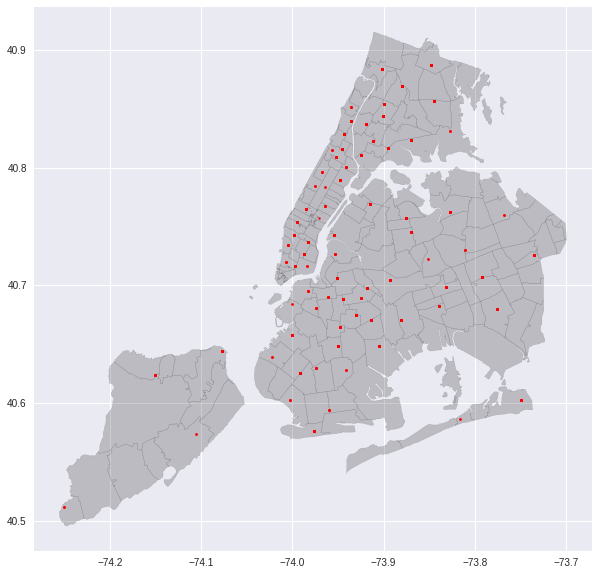

In [522]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
zipsNYC.plot(ax=ax, color = 'black',alpha=0.2, edgecolor='k')
dfZip.plot(ax=ax, column = 'Identifier', color='r', markersize=4)
pl.title('',size = 15)

In [209]:
!curl -O https://data.cityofnewyork.us/api/views/h76q-2zwc/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  179k    0  179k    0     0   179k      0 --:--:-- --:--:-- --:--:--  242k


In [211]:
os.system('mv rows.csv?accessType=DOWNLOAD ' + PUIdata)

0

In [212]:
!mv $PUIDATA/rows.csv?accessType=DOWNLOAD $PUIDATA/rape_2016.csv

In [440]:
df_2016 = pd.read_csv(PUIdata + "/rape_2016.csv")
df_2016.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,467976700,11/04/2016,04:05:00,11/04/2016,04:10:00,11/04/2016,104,RAPE,159,"RAPE 1,ATTEMPT",...,110,NaN,STREET,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,349236631,12/30/2016,17:00:00,12/30/2016,18:00:00,12/30/2016,104,RAPE,153,RAPE 3,...,40,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,732776367,12/31/2016,05:10:00,12/31/2016,08:38:00,12/31/2016,104,RAPE,157,RAPE 1,...,49,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,EASTCHESTER GARDENS,NaN,NaN,NaN,NaN,NaN
3,568504014,12/25/2016,22:00:00,12/25/2016,22:30:00,12/30/2016,104,RAPE,153,RAPE 3,...,102,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,141128752,12/17/2016,21:00:00,NaN,NaN,12/30/2016,104,RAPE,159,"RAPE 1,ATTEMPT",...,5,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [441]:
df_2016.rename(columns = {'CMPLNT_FR_DT':'occuredate','CMPLNT_FR_TM':'occurehour','PREM_TYP_DESC':'building','OFNS_DESC':'offense'},inplace = True)

In [442]:
df_2016 = df_2016[['occuredate','occurehour','building','offense']]
df_2016.head()

,occuredate,occurehour,building,offense
0,11/04/2016,04:05:00,STREET,RAPE
1,12/30/2016,17:00:00,RESIDENCE - APT. HOUSE,RAPE
2,12/31/2016,05:10:00,RESIDENCE - PUBLIC HOUSING,RAPE
3,12/25/2016,22:00:00,RESIDENCE - APT. HOUSE,RAPE
4,12/17/2016,21:00:00,RESIDENCE - APT. HOUSE,RAPE


In [443]:
df_2016_building = pd.DataFrame(df_2016.groupby('building')['offense'].count())
df_2016_building.head

<bound method DataFrame.head of                               offense
building                             
ABANDONED BUILDING                  1
BANK                                1
BAR/NIGHT CLUB                     13
BEAUTY & NAIL SALON                 1
CHURCH                              3
COMMERCIAL BUILDING                10
CONSTRUCTION SITE                   1
DEPARTMENT STORE                    1
FACTORY/WAREHOUSE                   1
FOOD SUPERMARKET                    1
GROCERY/BODEGA                      1
HOSPITAL                           19
HOTEL/MOTEL                        62
OPEN AREAS (OPEN LOTS)              2
OTHER                              26
PARK/PLAYGROUND                    21
PARKING LOT/GARAGE (PRIVATE)        4
PARKING LOT/GARAGE (PUBLIC)         4
PUBLIC BUILDING                     3
PUBLIC SCHOOL                       3
RESIDENCE - APT. HOUSE            557
RESIDENCE - PUBLIC HOUSING        153
RESIDENCE-HOUSE                   141
RESTAURANT/DINER  

In [444]:
df_2016_building = df_2016_building.T
df_2016_building.head()

building,ABANDONED BUILDING,BANK,BAR/NIGHT CLUB,BEAUTY & NAIL SALON,CHURCH,COMMERCIAL BUILDING,CONSTRUCTION SITE,DEPARTMENT STORE,FACTORY/WAREHOUSE,FOOD SUPERMARKET,...,RESIDENCE-HOUSE,RESTAURANT/DINER,SOCIAL CLUB/POLICY,STORE UNCLASSIFIED,STREET,TAXI (LIVERY LICENSED),TAXI (YELLOW LICENSED),TAXI/LIVERY (UNLICENSED),TRANSIT FACILITY (OTHER),VARIETY STORE
offense,1,1,13,1,3,10,1,1,1,1,...,141,3,1,2,94,1,1,1,2,1


In [445]:
(df_2016_building['RESIDENCE - APT. HOUSE']+df_2016_building['RESIDENCE - PUBLIC HOUSING']+df_2016_building['RESIDENCE-HOUSE'])/ (df_2016['offense'].count())

offense    0.745837
dtype: float64

In [446]:
weather = pd.read_csv('weather_2016.csv')
weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [447]:
w = weather[['date','average temperature','precipitation']]
w.head()

,date,average temperature,precipitation
0,1-1-2016,38.0,0.00
1,2-1-2016,36.0,0.00
2,3-1-2016,40.0,0.00
3,4-1-2016,25.0,0.00
4,5-1-2016,20.0,0.00


In [448]:
df_2016.head()

,occuredate,occurehour,building,offense
0,11/04/2016,04:05:00,STREET,RAPE
1,12/30/2016,17:00:00,RESIDENCE - APT. HOUSE,RAPE
2,12/31/2016,05:10:00,RESIDENCE - PUBLIC HOUSING,RAPE
3,12/25/2016,22:00:00,RESIDENCE - APT. HOUSE,RAPE
4,12/17/2016,21:00:00,RESIDENCE - APT. HOUSE,RAPE


In [488]:
w['date'] = pd.to_datetime(w.date)
df_2016['occuredate'] = pd.to_datetime(df_2016.occuredate)
d_2016 = df_2016.merge(w,left_on='occuredate',right_on='date',how='left')
d_2016.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,occuredate,occurehour,building,offense,date,average temperature,precipitation
0,2016-11-04,04:05:00,STREET,RAPE,2016-11-04,54.0,0.01
1,2016-12-30,17:00:00,RESIDENCE - APT. HOUSE,RAPE,2016-12-30,36.5,0.01
2,2016-12-31,05:10:00,RESIDENCE - PUBLIC HOUSING,RAPE,2016-12-31,37.5,0
3,2016-12-25,22:00:00,RESIDENCE - APT. HOUSE,RAPE,2016-12-25,43.0,0
4,2016-12-17,21:00:00,RESIDENCE - APT. HOUSE,RAPE,2016-12-17,31.5,0.73


In [489]:
d_2016.rename(columns={'average temperature':'temperature'},inplace=True)
d_2016.head()

,occuredate,occurehour,building,offense,date,temperature,precipitation
0,2016-11-04,04:05:00,STREET,RAPE,2016-11-04,54.0,0.01
1,2016-12-30,17:00:00,RESIDENCE - APT. HOUSE,RAPE,2016-12-30,36.5,0.01
2,2016-12-31,05:10:00,RESIDENCE - PUBLIC HOUSING,RAPE,2016-12-31,37.5,0
3,2016-12-25,22:00:00,RESIDENCE - APT. HOUSE,RAPE,2016-12-25,43.0,0
4,2016-12-17,21:00:00,RESIDENCE - APT. HOUSE,RAPE,2016-12-17,31.5,0.73


In [490]:
d_2016['precipitation'] = pd.to_numeric(d_2016['precipitation'],errors='coerce')
d_2016['precipitation'][d_2016['precipitation'].isnull()] = 0
d_2016.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,temperature,precipitation
count,1141.000000,1141.000000
mean,58.156442,0.128738
std,17.499068,0.341207
min,7.000000,0.000000
25%,45.000000,0.000000
50%,56.500000,0.000000
75%,74.500000,0.050000
max,88.500000,2.310000


In [491]:
d_2016['weekday'] = [i not in [5,6,7] for i in d_2016['occuredate'].dt.weekday.values]
d_2016['occuremonth'] = pd.to_datetime(d_2016['occuredate']).dt.month
d_2016['season'] = d_2016['occuremonth'].map({1: 4,
                              2: 4,
                              3: 4,
                              4: 3,
                              5: 3,
                              6: 3,
                              7: 2,
                              8: 2,
                              9: 2,
                              10: 1,
                              11: 1,
                              12: 1})
d_2016['building'] = d_2016['building'].map({'ABANDONED BUILDING':'Public',
                                             'BANK ':'Public',
                                             'BAR/NIGHT CLUB':'Public',            
'BEAUTY & NAIL SALON':'Public', 
'CHURCH':'Public',                             
'COMMERCIAL BUILDING':'Public',             
'CONSTRUCTION SITE':'Public',
'DEPARTMENT STORE':'Public',                    
'FACTORY/WAREHOUSE':'Public',             
'FOOD SUPERMARKET':'Public',                    
'GROCERY/BODEGA':'Public',                      
'HOSPITAL':'Public',
'HOTEL/MOTEL':'Private',
'OPEN AREAS (OPEN LOTS)':'Public',              
'OTHER':'Public',                      
'PARK/PLAYGROUND':'Public',                   
'PARKING LOT/GARAGE (PRIVATE)':'Public',
'PARKING LOT/GARAGE (PUBLIC)':'Public',     
'PUBLIC BUILDING':'Public',                  
'PUBLIC SCHOOL':'Public',                       
'RESIDENCE - APT. HOUSE':'Private',           
'RESIDENCE - PUBLIC HOUSING':'Private',     
'RESIDENCE-HOUSE':'Private',       
'RESTAURANT/DINER':'Public',                    
'SOCIAL CLUB/POLICY':'Public',                  
'STORE UNCLASSIFIED':'Public',                  
'STREET':'Public',
'TAXI (LIVERY LICENSED)':'Transportation',              
'TAXI (YELLOW LICENSED)':'Transportation',              
'TAXI/LIVERY (UNLICENSED)':'Transportation',       
'TRANSIT FACILITY (OTHER)':'Transportation',            
'VARIETY STORE':'Public' })
d_2016.head()

,occuredate,occurehour,building,offense,date,temperature,precipitation,weekday,occuremonth,season
0,2016-11-04,04:05:00,Public,RAPE,2016-11-04,54.0,0.01,True,11,1
1,2016-12-30,17:00:00,Private,RAPE,2016-12-30,36.5,0.01,True,12,1
2,2016-12-31,05:10:00,Private,RAPE,2016-12-31,37.5,0.00,False,12,1
3,2016-12-25,22:00:00,Private,RAPE,2016-12-25,43.0,0.00,False,12,1
4,2016-12-17,21:00:00,Private,RAPE,2016-12-17,31.5,0.73,False,12,1


In [492]:
d_2016['hour'] = pd.to_datetime(d_2016['occurehour']).dt.hour

In [493]:
d = pd.DataFrame(d_2016.groupby(['date','hour','occuremonth','offense'],as_index=False).size())
d.reset_index(inplace=True)
d.columns = ['date','hour','occuremonth','offense','Count']
d.head()

,date,hour,occuremonth,offense,Count
0,2016-01-01,0,1,RAPE,11
1,2016-01-01,1,1,RAPE,2
2,2016-01-01,2,1,RAPE,2
3,2016-01-01,5,1,RAPE,2
4,2016-01-01,12,1,RAPE,1


In [512]:
d_hour = pd.DataFrame(d_2016.groupby('hour')['offense'].count())
d_hour.reset_index(inplace=True)
d_hour.offense


0     128
1      73
2      71
3      59
4      55
5      44
6      28
7      32
8      34
9      21
10     22
11     20
12     47
13     32
14     32
15     53
16     34
17     33
18     46
19     35
20     46
21     59
22     69
23     68
Name: offense, dtype: int64

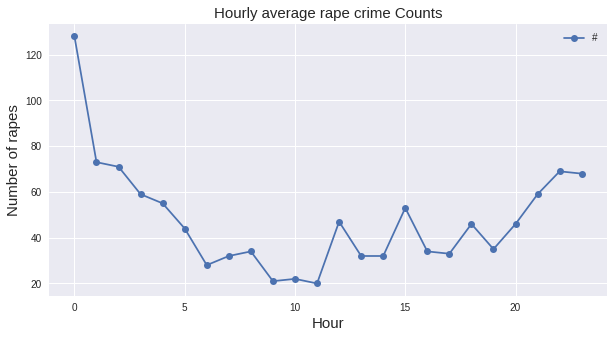

In [495]:
pl.figure(figsize=(10,5))
sns.set(style="darkgrid")
pl.plot((d_hour['offense']),'o-',label=i)
pl.legend('#')
pl.xlabel('Hour',size=15)
pl.ylabel('Number of rapes',size=15)
pl.title('Hourly average rape crime Counts',size=15)
pl.savefig('Avgrape_Hour.png',dpi=300)

In [523]:
d_month = pd.DataFrame(d_2016.groupby('occuremonth')['offense'].count())
d_month.reset_index(inplace=True)
d_month

,occuremonth,offense
0,1,84
1,2,84
2,3,91
3,4,107
4,5,107
5,6,105
6,7,137
7,8,112
8,9,88
9,10,100


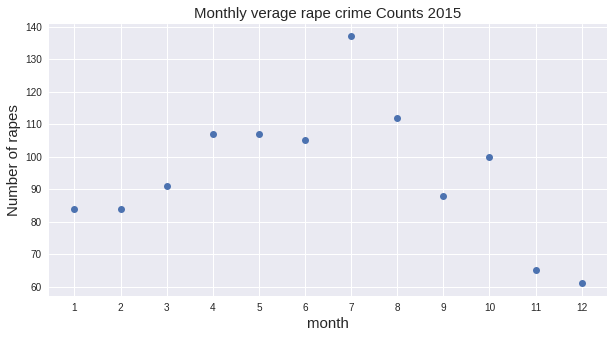

In [527]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.set(style="darkgrid")
ax.plot(d_month['offense'],'o')
ax.set_xlabel('month',size=15)
ax.set_xticks(np.arange(len(d_month)))
ax.set_xticklabels(d_month['occuremonth'],rotation = 0)
ax.set_ylabel('Number of rapes',size=15)
ax.set_title('Monthly verage rape crime Counts 2015',size=15)

In [499]:
dm_2016 = pd.DataFrame(d_2016.groupby(['building','temperature','weekday','precipitation','occuremonth','season'],as_index=False).size())
dm_2016.reset_index(inplace=True)
dm_2016.columns = ['building','temperature','weekday','precipitation','occuremonth','season','Count']
dm_2016.head()

,building,temperature,weekday,precipitation,occuremonth,season,Count
0,Private,7.0,False,0.0,2,4,4
1,Private,14.0,False,0.0,2,4,1
2,Private,20.0,False,0.0,5,3,6
3,Private,21.0,True,0.0,12,1,3
4,Private,22.0,True,0.0,1,4,1


In [506]:
lm2 = smf.ols(formula="Count ~ weekday + precipitation + temperature + C(building, Treatment(reference='Public')) + occuremonth + season",data=dm_2016).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     11.96
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           4.86e-14
Time:                        18:37:52   Log-Likelihood:                -922.93
No. Observations:                 468   AIC:                             1862.
Df Residuals:                     460   BIC:                             1895.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        3.3752      1.452      2.325      0.020         0.523     6.228
weekday[T.True]                                                 -0.2048      0.174     -1.174      0.241        -0.548     0.138
C(building, Treatment(reference='Public'))[T.Private]            1.4773      0.175      8.439      0.000         1.133     1.821
C(building, Treatment(reference='Public'))[T.Transportation]    -0.3188      0.801     -0.398      0.691        -1.894     1.256
precipitation                                                    0.0029      0.249      0.012      0.991        -0.487     0.493
temperature                                                      0.0085      0.005      1.771      0.077        -0.001     0.018
occuremonth                                                     -0.1860      0.100     -1.866      0.063        -0.382     0.010
season                                                          -0.4317      0.306     -1.409      0.160        -1.034     0.171
==============================================================================
Omnibus:                      246.205   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1660.531
Skew:                           2.224   Prob(JB):                         0.00
Kurtosis:                      11.085   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [428]:
lm_weekday = smf.ols(formula="Count ~ weekday", data=dm_2016).fit()
lm_weekday.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.01590
Date:                Thu, 14 Dec 2017   Prob (F-statistic):              0.900
Time:                        15:00:46   Log-Likelihood:                -1092.0
No. Observations:                 759   AIC:                             2188.
Df Residuals:                     757   BIC:                             2197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           1.5020      0.064     23.482      0.000         1.376     1.628
weekday[T.True]    -0.0099      0.078     -0.126      0.900        -0.164     0.144
==============================================================================
Omnibus:                      579.543   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9285.690
Skew:                           3.396   Prob(JB):                         0.00
Kurtosis:                      18.731   Cond. No.                         3.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [429]:
lm_temperature = smf.ols(formula="Count ~ temperature", data=dm_2016).fit()
lm_temperature.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3324
Date:                Thu, 14 Dec 2017   Prob (F-statistic):              0.564
Time:                        15:01:35   Log-Likelihood:                -1091.9
No. Observations:                 759   AIC:                             2188.
Df Residuals:                     757   BIC:                             2197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       1.5680      0.131     11.938      0.000         1.310     1.826
temperature    -0.0012      0.002     -0.577      0.564        -0.005     0.003
==============================================================================
Omnibus:                      578.148   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9196.659
Skew:                           3.388   Prob(JB):                         0.00
Kurtosis:                      18.649   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [430]:
lm_building = smf.ols(formula="Count ~ building", data=dm_2016).fit()
lm_building.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     4.990
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           2.58e-16
Time:                        15:03:08   Log-Likelihood:                -1018.8
No. Observations:                 759   AIC:                             2102.
Df Residuals:                     727   BIC:                             2250.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------
Intercept                                    1.0000      0.946      1.057      0.291        -0.858     2.858
building[T.BANK]                           1.71e-14      1.338   1.28e-14      1.000        -2.628     2.628
building[T.BAR/NIGHT CLUB]               -1.105e-14      0.982  -1.12e-14      1.000        -1.928     1.928
building[T.BEAUTY & NAIL SALON]          -2.909e-14      1.338  -2.17e-14      1.000        -2.628     2.628
building[T.CHURCH]                        -7.05e-15      1.093  -6.45e-15      1.000        -2.145     2.145
building[T.COMMERCIAL BUILDING]           3.886e-15      0.993   3.91e-15      1.000        -1.949     1.949
building[T.CONSTRUCTION SITE]            -2.953e-14      1.338  -2.21e-14      1.000        -2.628     2.628
building[T.DEPARTMENT STORE]             -1.031e-14      1.338  -7.71e-15      1.000        -2.628     2.628
building[T.FACTORY/WAREHOUSE]            -2.243e-14      1.338  -1.68e-14      1.000        -2.628     2.628
building[T.FOOD SUPERMARKET]             -2.215e-14      1.338  -1.65e-14      1.000        -2.628     2.628
building[T.GROCERY/BODEGA]               -2.665e-14      1.338  -1.99e-14      1.000        -2.628     2.628
building[T.HOSPITAL]                         0.0556      0.972      0.057      0.954        -1.853     1.965
building[T.HOTEL/MOTEL]                      0.0877      0.955      0.092      0.927        -1.787     1.962
building[T.OPEN AREAS (OPEN LOTS)]       -3.797e-14      1.159  -3.28e-14      1.000        -2.276     2.276
building[T.OTHER]                         -9.77e-15      0.964  -1.01e-14      1.000        -1.893     1.893
building[T.PARK/PLAYGROUND]                  0.1053      0.971      0.108      0.914        -1.801     2.012
building[T.PARKING LOT/GARAGE (PRIVATE)]     0.3333      1.093      0.305      0.760        -1.812     2.479
building[T.PARKING LOT/GARAGE (PUBLIC)]  -3.109e-14      1.058  -2.94e-14      1.000        -2.077     2.077
building[T.PUBLIC BUILDING]              -7.772e-15      1.093  -7.11e-15      1.000        -2.145     2.145
building[T.PUBLIC SCHOOL]                -1.593e-14      1.093  -1.46e-14      1.000        -2.145     2.145
building[T.RESIDENCE - APT. HOUSE]           1.0554      0.948      1.113      0.266        -0.806     2.917
building[T.RESIDENCE - PUBLIC HOUSING]       0.3190      0.950      0.336      0.737        -1.547     2.185
building[T.RESIDENCE-HOUSE]                  0.2261      0.951      0.238      0.812        -1.640     2.092
building[T.RESTAURANT/DINER]             -2.542e-14      1.093  -2.33e-14      1.000        -2.145     2.145
building[T.SOCIAL CLUB/POLICY]           -2.266e-14      1.338  -1.69e-14      1.000        -2.628     2.628
building[T.STORE UNCLASSIFIED] 

In [431]:
lm_season = smf.ols(formula="Count ~ season", data=dm_2016).fit()
lm_season.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4464
Date:                Thu, 14 Dec 2017   Prob (F-statistic):              0.504
Time:                        15:04:06   Log-Likelihood:                -1091.8
No. Observations:                 759   AIC:                             2188.
Df Residuals:                     757   BIC:                             2197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.5552      0.097     16.062      0.000         1.365     1.745
season        -0.0233      0.035     -0.668      0.504        -0.092     0.045
==============================================================================
Omnibus:                      577.992   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9175.559
Skew:                           3.387   Prob(JB):                         0.00
Kurtosis:                      18.628   Cond. No.                         8.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""